In [2]:
pip install efficient-apriori

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
from efficient_apriori import apriori # for association analysis
data = [['Skirt','Sneakers','Scarf','Pants','Hat'],
        ['Sunglasses', 'Skirt','Sneakers','Pants','Hat'],
        ['Dress','Sandals','Scarf','Pants','Heels'],
        ['Dress', 'Necklace','Earrings','Scarf','Hat','Heels','Hat'],
        ['Earrings','Skirt','Skirt','Scarf','Shirt','Pants']]

df = pd.DataFrame(data)
print (df)


            0         1         2      3      4      5     6
0       Skirt  Sneakers     Scarf  Pants    Hat   None  None
1  Sunglasses     Skirt  Sneakers  Pants    Hat   None  None
2       Dress   Sandals     Scarf  Pants  Heels   None  None
3       Dress  Necklace  Earrings  Scarf    Hat  Heels   Hat
4    Earrings     Skirt     Skirt  Scarf  Shirt  Pants  None


Before we run the association rule analysis,first we look at the items' frequency distribution.

In [10]:
# Put all transactions into a single list
txns=df.values.reshape(-1).tolist()

# Create a dataframe using this single list and add a column for count
df_list=pd.DataFrame(txns)
df_list['Count']=1

# Group by items and rename columns
df_list=df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True) # count
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum()) # percentage
df_list=df_list.rename(columns={0 : 'Item'})

# Show dataframe
df_list


,Item,Count,Percentage
4,Necklace,1,0.035714
6,Sandals,1,0.035714
8,Shirt,1,0.035714
11,Sunglasses,1,0.035714
0,Dress,2,0.071429
1,Earrings,2,0.071429
3,Heels,2,0.071429
10,Sneakers,2,0.071429
2,Hat,4,0.142857
5,Pants,4,0.142857


we can see that hats , pants, scarfs , skirts are the most popular items bought 


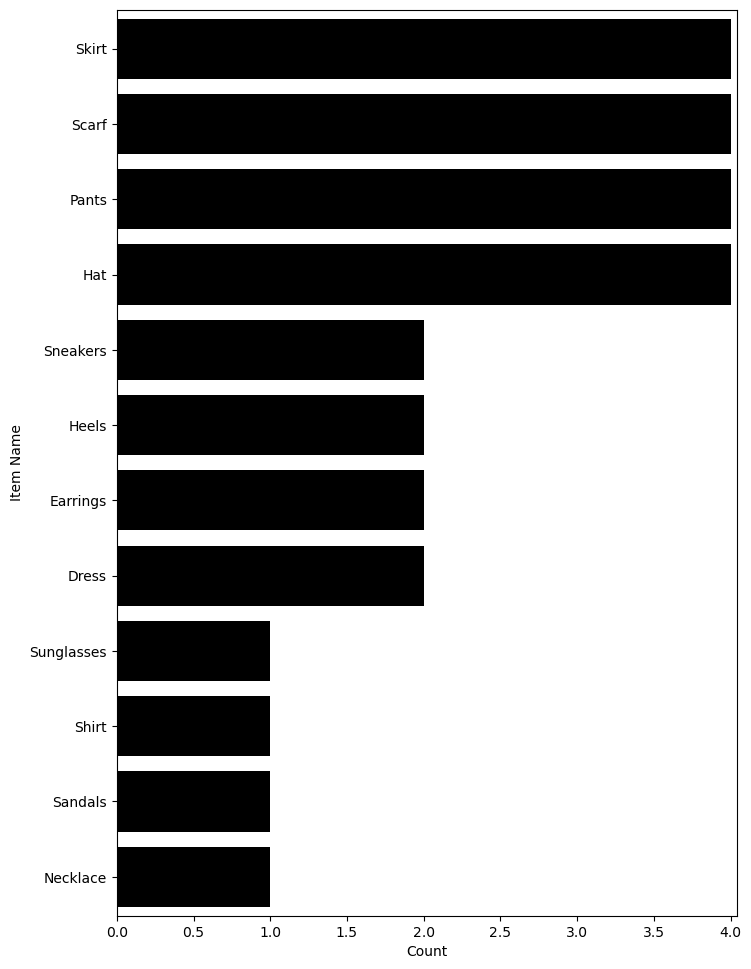

In [13]:
# Draw a horizontal bar chart
plt.figure(figsize=(8,12), dpi=100)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins(0.01)   
plt.show()

let’s run the Apriori algorithm

In [16]:
# Create a list of lists from a dataframe
txns2=df.stack().groupby(level=0).apply(list).tolist()
# Show what it looks like
txns2

[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
 ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
 ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
 ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
 ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [17]:
itemsets, rules = apriori(txns2, min_support=0.03, min_confidence=0.2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 12 candidate itemsets of length 1.
  Found 12 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 66 candidate itemsets of length 2.
  Found 40 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 60 candidate itemsets of length 3.
  Found 54 large itemsets of length 3.
 Counting itemsets of length 4.
  Found 34 candidate itemsets of length 4.
  Found 34 large itemsets of length 4.
 Counting itemsets of length 5.
  Found 10 candidate itemsets of length 5.
  Found 10 large itemsets of length 5.
 Counting itemsets of length 6.
  Found 1 candidate itemsets of length 6.
  Found 1 large itemsets of length 6.
 Counting itemsets of length 7.
  Found 0 candidate itemsets of length 7.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
 Generating rules of size 3.
 Generating rules of size 4.
 Generating rules of size 5.
 Generating rules of size 6.
Rule generatio

Let’s now print the association rules found by the algorithm

In [18]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

{Dress, Earrings} -> {Necklace} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Necklace} -> {Dress, Earrings} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Dress, Hat} -> {Necklace} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Necklace} -> {Dress, Hat} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Dress, Pants} -> {Sandals} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Sandals} -> {Dress, Pants} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Earrings, Hat} -> {Necklace} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Necklace} -> {Earrings, Hat} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Earrings, Heels} -> {Necklace} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Necklace} -> {Earrings, Heels} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{Earrings, Pants} -> {Shirt} (conf: 1.000, supp: 0.200, lift: 5.000, conv: 800000000.000)
{S

# use a bigger dataset

In [19]:
data = pd.read_csv('Market_Basket_Optimisation.csv')
data

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Put all transactions into a single list
t=data.values.reshape(-1).tolist()

# Create a dataframe using this single list and add a column for count
data_list=pd.DataFrame(t)
data_list['Count']=1

# Group by items and rename columns
data_list=data_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True) # count
data_list['Percentage'] = (data_list['Count'] / data_list['Count'].sum()) # percentage
data_list=data_list.rename(columns={0 : 'Item'})

# Show dataframe
data_list


,Item,Count,Percentage
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000239
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041918
43,french fries,1282,0.043690
100,spaghetti,1306,0.044508
37,eggs,1348,0.045939


We can see that mineral water (1,787) is  the most popular item bought at this supermarket, followed by eggs (1,348), spaghetti (1,306), french fries (1,282), and chocolate (1,230). Meanwhile, poor old asparagus has only been bought once.


Let’s also display frequency distribution

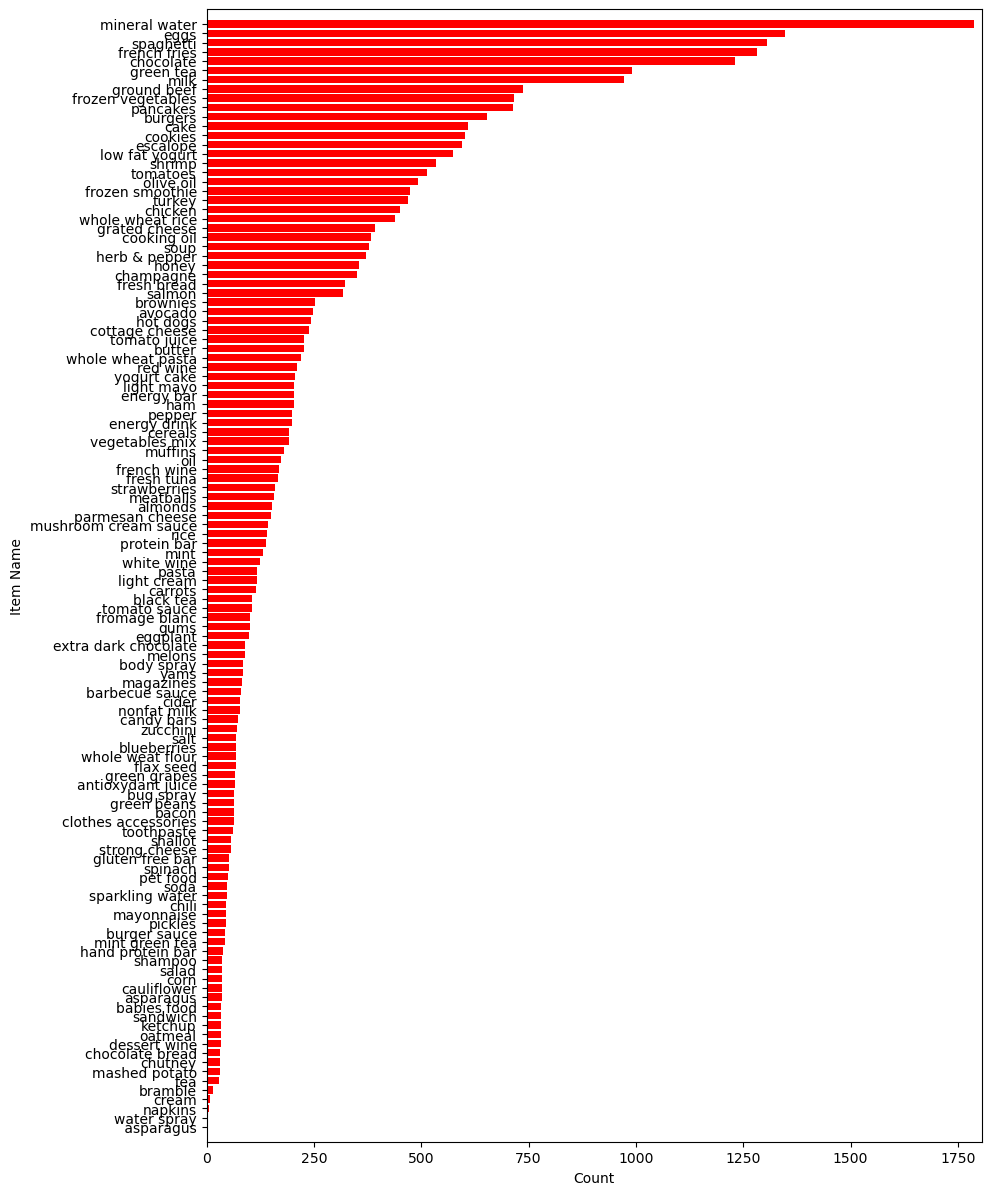

In [31]:
# Draw a horizontal bar chart
plt.figure(figsize=(10,15), dpi=100)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(data_list['Item'], width=data_list['Count'], color='red', height=0.8)
plt.margins(0.01)   
plt.show()

Before we run the algorithm, let’s put our data in the required format. It will be a list of lists that has all those “NaNs” will be  removed.


In [35]:
# Create a list of lists from a dataframe
tr=data.stack().groupby(level=0).apply(list).tolist()
tr

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [36]:
itemsets, rules = apriori(tr, min_support=0.03, min_confidence=0.2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 36 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 630 candidate itemsets of length 2.
  Found 18 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 14 candidate itemsets of length 3.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



Let’s now print the association rules found by the algorithm

In [37]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.573, conv: 1.218)
{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)
{spaghetti} -> {milk} (conf: 0.204, supp: 0.035, lift: 1.572, conv: 1.093)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {chocolate} (conf: 0.248, supp: 0.032, lift: 1.513, conv: 1.112)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)
{chocolate} -> {spaghett